In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [65]:
# Load the dataset
file_path = 'Reviews.csv'
reviews = pd.read_csv('/content/Reviews.csv')

print(reviews.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [66]:
 reviews_df = pd.read_csv("/content/Reviews.csv", encoding="latin-1")

Using encoding="latin-1" can help avoid errors if the file contains special characters or non-ASCII text, which would otherwise cause a UnicodeDecodeError when loading with the default UTF-8 encod

In [67]:
reviews_df['Text']

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
...,...
568449,Great for sesame chicken..this is a good if no...
568450,I'm disappointed with the flavor. The chocolat...
568451,"These stars are small, so you can give 10-15 o..."
568452,These are the BEST treats for training and rew...


In [68]:
reviews_df.duplicated().sum()

0

In [1]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

**Exploratory Data Analysis(EDA)**

In [72]:
print(reviews_df.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


**Distribution Analysis**

Helpfulness Ratio

In [73]:
reviews_df['HelpfulnessRatio'] = reviews_df.apply(
    lambda row: row['HelpfulnessNumerator'] / row['HelpfulnessDenominator'] if row['HelpfulnessDenominator'] > 0 else 0, axis=1
)

print(reviews_df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'HelpfulnessRatio']].head())


   HelpfulnessNumerator  HelpfulnessDenominator  HelpfulnessRatio
0                     1                       1               1.0
1                     0                       0               0.0
2                     1                       1               1.0
3                     3                       3               1.0
4                     0                       0               0.0


**WORD Count**

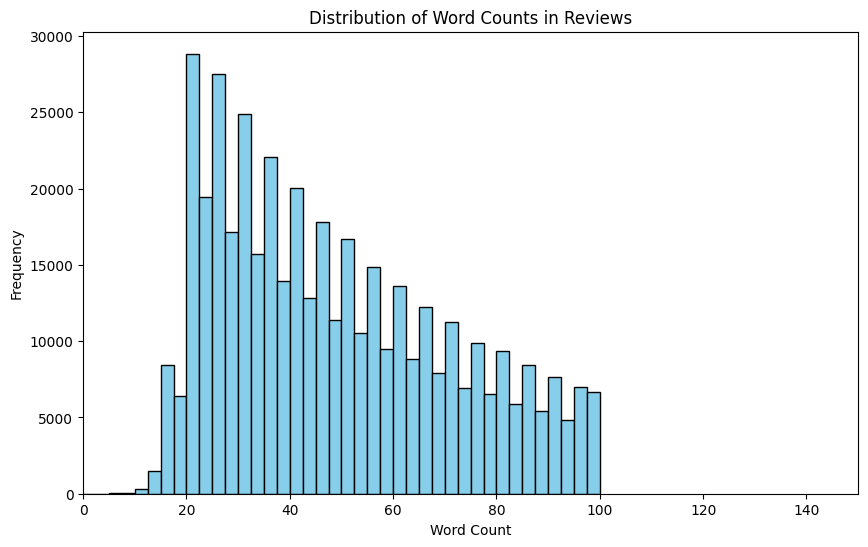

In [ ]:
import matplotlib.pyplot as plt

# Calculate word count for each review
reviews_df['WordCount'] = reviews_df['Text'].apply(lambda x: len(str(x).split()))

# Plot the distribution of word counts with a smaller range
plt.figure(figsize=(10, 6))
plt.hist(reviews_df['WordCount'], bins=40, color='skyblue', edgecolor='black', range=(0, 100))
plt.title("Distribution of Word Counts in Reviews")
plt.xlabel("Word Count")
plt.ylabel("Frequency") # Increase the bin size to smooth out the distribution
plt.xlim(0, 150)  # Set x-axis limit to focus on typical range
plt.show()


**Average Helpfulness Ratio**

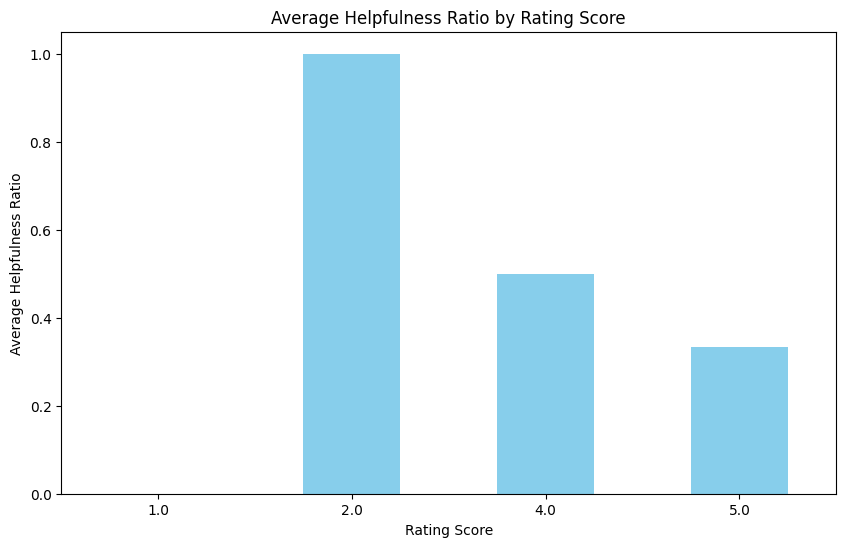

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average HelpfulnessRatio for each Score
helpfulness_by_score = reviews_df.groupby('Score')['HelpfulnessRatio'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
helpfulness_by_score.plot(kind='bar', color='skyblue')
plt.title("Average Helpfulness Ratio by Rating Score")
plt.xlabel("Rating Score")
plt.ylabel("Average Helpfulness Ratio")
plt.xticks(rotation=0)
plt.show()


The Average Helpfulness Ratio by Rating Score helps assess how useful a product's reviews are to other customers, segmented by different rating levels. It provides insights into whether high or low-rated products receive more helpful feedback. Analyzing this ratio can identify patterns in review quality and guide potential customers in making informed purchasing decisions. It also highlights areas where products may need improvement based on customer feedback.

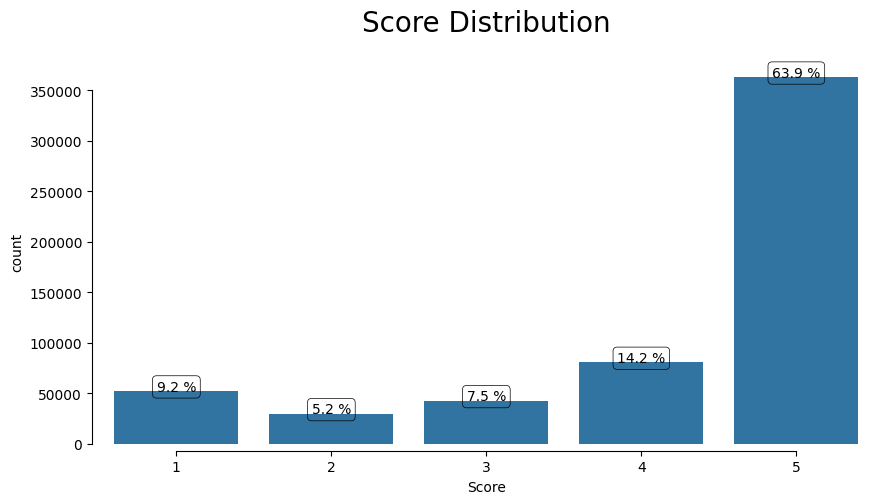

In [57]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=reviews_df['Score'])
total=float(len(reviews_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 75,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
ax.set_title('Score Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

In [62]:
def remove_punctuation(reviews_df):
    table = str.maketrans('', '', string.punctuation)
    return reviews_df.translate(table)

In [79]:
print(reviews_df)

            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominato

<ipython-input-32-5a0ee573b422>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews_df, x='Score', palette='viridis')


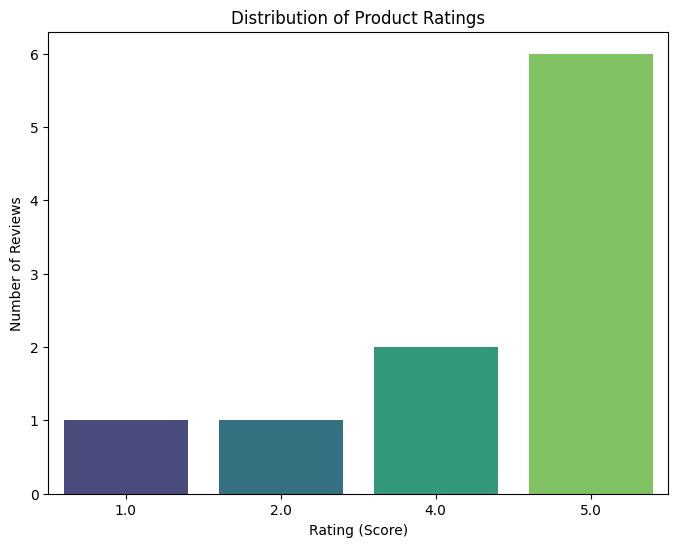

In [ ]:
def map_rating_to_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Applying mapping to dataset
reviews_df['Sentiment'] = reviews_df['Score'].apply(map_rating_to_sentiment)

plt.figure(figsize=(8, 6))
sns.countplot(data=reviews_df, x='Score', palette='viridis')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating (Score)")
plt.ylabel("Number of Reviews")
plt.show()

In [ ]:
# Initializing sentiment analysis and summarizing tasks
sentiment_analyzer = pipeline("sentiment-analysis")
summarizer = pipeline("summarization")

# Initialize tokenizer for handling token-based truncation
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Define a helper function to truncate text to the model's max token length
def truncate_by_tokens(text, max_length=512):
    tokens = tokenizer(text, truncation=True, max_length=max_length, return_tensors="pt")
    return tokenizer.decode(tokens["input_ids"][0], skip_special_tokens=True)

# Process a subset of reviews (first 100) with token-based truncation
sample_reviews = reviews_df['Text'][:100].apply(lambda x: truncate_by_tokens(x))

# Sentiment Analysis on truncated reviews
sentiments = [sentiment_analyzer(text)[0]['label'] for text in sample_reviews]

# Text Summarization on truncated reviews
summaries = [summarizer(text, max_length=30, min_length=10, do_sample=False)[0]['summary_text'] for text in sample_reviews]

# Add sentiment and summary results to the DataFrame
reviews_df_subset = reviews_df[:100].copy()
reviews_df_subset['Sentiment'] = sentiments
reviews_df_subset['Summary'] = summaries

# Display a few examples of the truncated reviews with sentiment-tagged summaries
print(reviews_df_subset[['Text', 'Sentiment', 'Summary']].head())

NameError: name 'pipeline' is not defined

In [ ]:
from transformers import pipeline, AutoTokenizer

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
def truncate_by_tokens(text, max_length=512):
    tokens = tokenizer(text, truncation=True, max_length=max_length, return_tensors="pt")
    return tokenizer.decode(tokens["input_ids"][0], skip_special_tokens=True)

sample_reviews = reviews_df['Text'][:100].apply(lambda x: truncate_by_tokens(x))


In [ ]:
def process_review(review_text, sentiment_label):
    truncated_text = truncate_by_tokens(review_text)

    # Modifying the text for Summarization based on the Sentiment
    if sentiment_label == 'Positive':
        modified_text = f"This is positive review: {truncated_text}"
    elif sentiment_label == 'Negative':
        modified_text = f"This is negative review: {truncated_text}"
    else:  # Neutral review
        modified_text = f"This is a neutral review: {truncated_text}"

    summary = summarizer(modified_text, max_length=30, min_length=10, do_sample=False)[0]['summary_text']

    # Combining the sentiment and summary into a result as needed
    result = {
        "original_review": review_text,
        "sentiment": sentiment_label,
        "summary": summary
    }
    return result

# Applying processing to first 10 for demo
processed_reviews = [
    process_review(review, sentiment)
    for review, sentiment in zip(reviews_df['Text'][:10], reviews_df['Sentiment'][:10])
]

for review in processed_reviews:
    print("Original Review:", review["original_review"])
    print("Sentiment:", review["sentiment"])
    print("Summary:", review["summary"])
    print("-" * 50)

Original Review: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
Sentiment: Positive
Summary: The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product
--------------------------------------------------
Original Review: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
Sentiment: Negative
Summary: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error
--------------------------------------------------
Original Review: This is a confection that has been around a few centuries.  It is a lig

In [ ]:
processed_reviews_df = pd.DataFrame(processed_reviews)

processed_reviews_df['Sentiment_Summary'] = processed_reviews_df.apply(
    lambda row: f"{row['sentiment']}: {row['summary']}", axis=1
)

print(processed_reviews_df[['Sentiment_Summary']].head())

                                   Sentiment_Summary
0  Positive: The product looks more like a stew t...
1  Negative: Product arrived labeled as Jumbo Sal...
2  Positive: Filberts is a light, pillowy citrus ...
3  Negative: If you are looking for the secret in...
4  Positive: This is a positive review: Great taf...


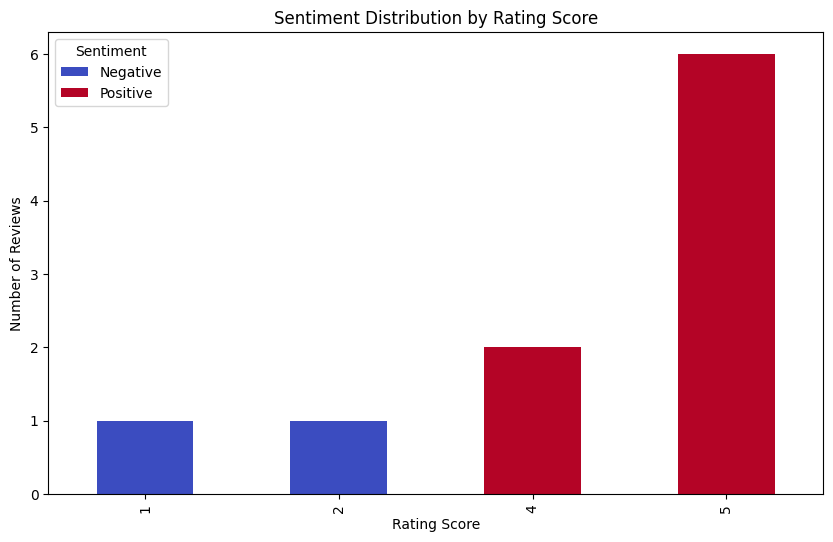

In [ ]:
processed_reviews_df['Score'] = reviews_df['Score'][:10]

sentiment_by_rating = processed_reviews_df.groupby(['Score', 'sentiment']).size().unstack(fill_value=0)

sentiment_by_rating.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Sentiment Distribution by Rating Score")
plt.xlabel("Rating Score")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.show()

In [ ]:
print(sentiment_by_rating)


sentiment  Negative  Positive
Score                        
1                 1         0
2                 1         0
4                 0         2
5                 0         6


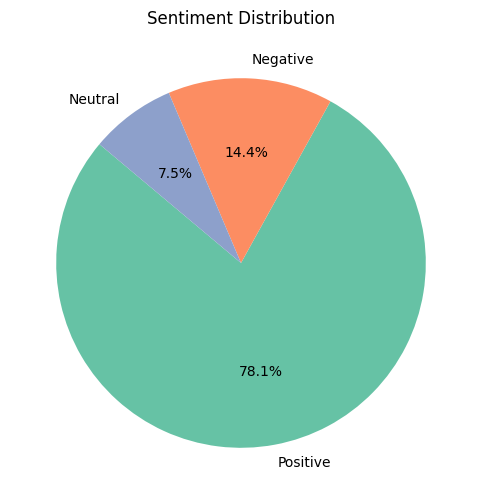

In [ ]:
# Sentiment Distribution using pie chart
sentiment_counts = reviews_df['Sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title("Sentiment Distribution")
plt.show()


<ipython-input-11-5bcfd0e2c53b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=reviews_df, x='Sentiment', y='HelpfulnessRatio', palette='coolwarm')


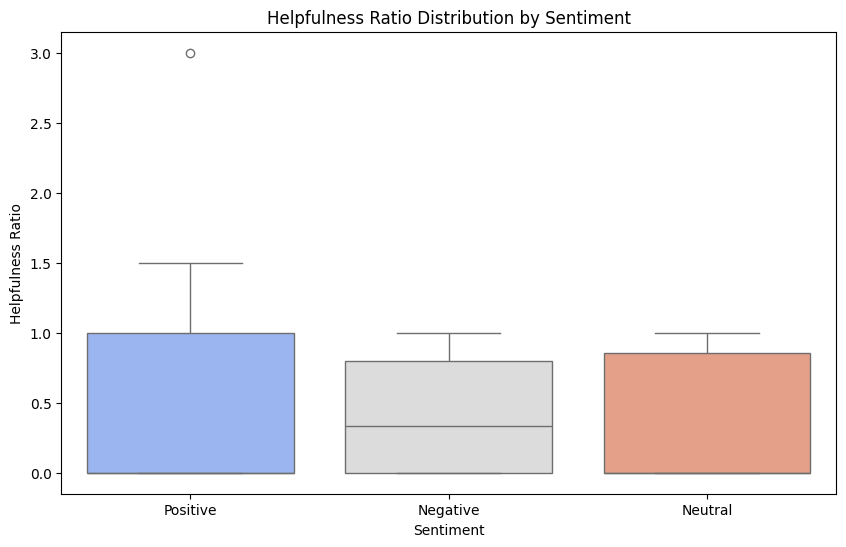

In [ ]:
# Helpfulness Ratio Distribution by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=reviews_df, x='Sentiment', y='HelpfulnessRatio', palette='coolwarm')
plt.title("Helpfulness Ratio Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Helpfulness Ratio")
plt.show()


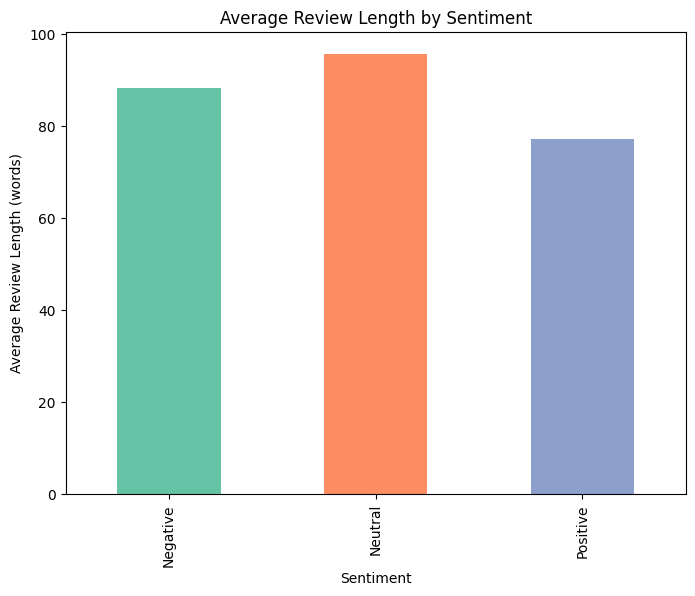

In [ ]:
reviews_df['ReviewLength'] = reviews_df['Text'].apply(lambda x: len(x.split()))

avg_review_length = reviews_df.groupby('Sentiment')['ReviewLength'].mean()
plt.figure(figsize=(8, 6))
avg_review_length.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title("Average Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Review Length (words)")
plt.show()


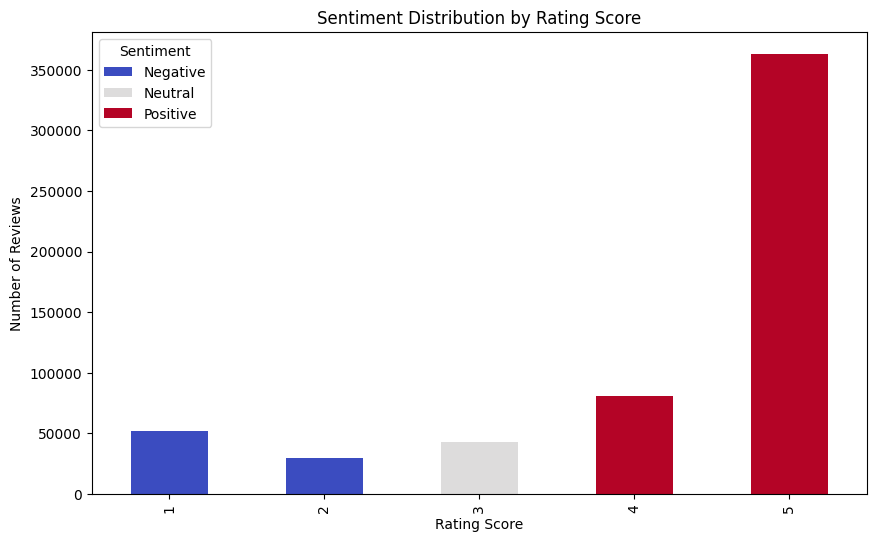

In [ ]:
sentiment_by_rating = reviews_df.groupby(['Score', 'Sentiment']).size().unstack(fill_value=0)

sentiment_by_rating.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Sentiment Distribution by Rating Score")
plt.xlabel("Rating Score")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.show()


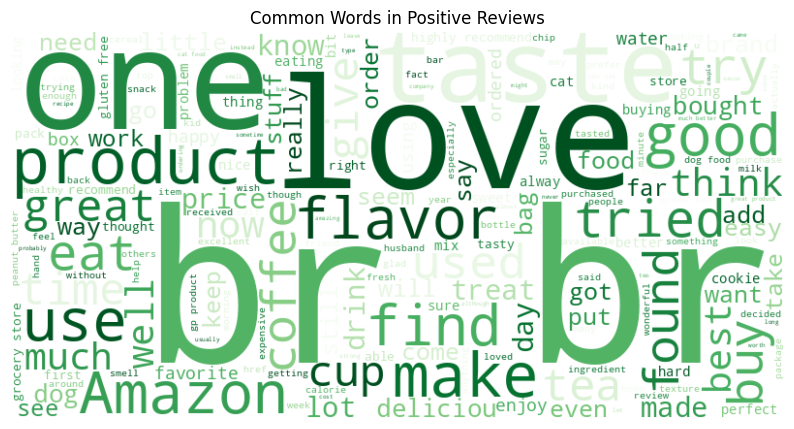

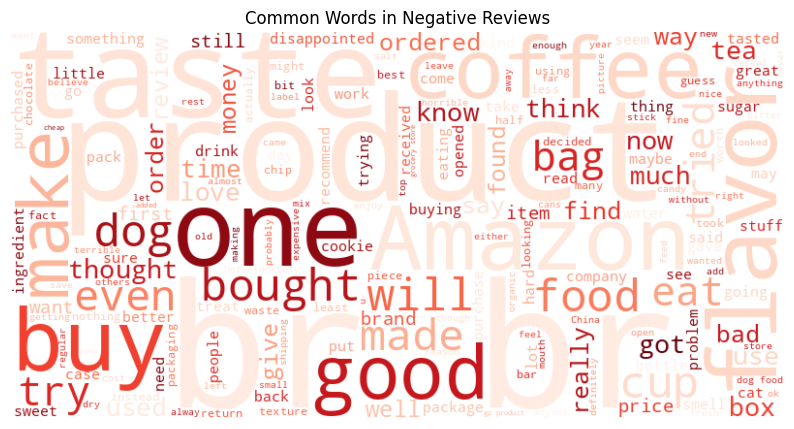

In [ ]:
from wordcloud import WordCloud

positive_text = " ".join(review for review in reviews_df[reviews_df['Sentiment'] == 'Positive']['Text'])
negative_text = " ".join(review for review in reviews_df[reviews_df['Sentiment'] == 'Negative']['Text'])

# Positive Word Cloud
plt.figure(figsize=(10, 6))
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Positive Reviews")
plt.show()

# Negative Word Cloud
plt.figure(figsize=(10, 6))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Negative Reviews")
plt.show()


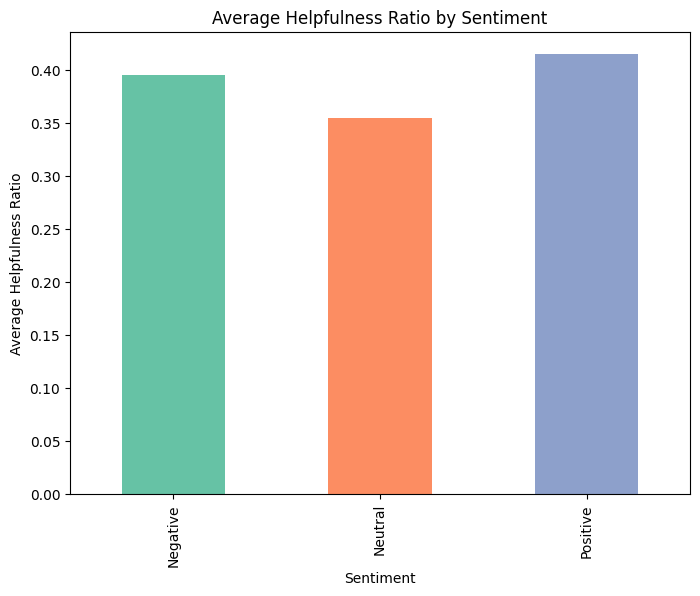

In [ ]:
avg_helpfulness_ratio = reviews_df.groupby('Sentiment')['HelpfulnessRatio'].mean()
plt.figure(figsize=(8, 6))
avg_helpfulness_ratio.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title("Average Helpfulness Ratio by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Helpfulness Ratio")
plt.show()


<ipython-input-16-edd5b6da9c22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=reviews_df, x='Score', y='ReviewLength', palette='viridis')


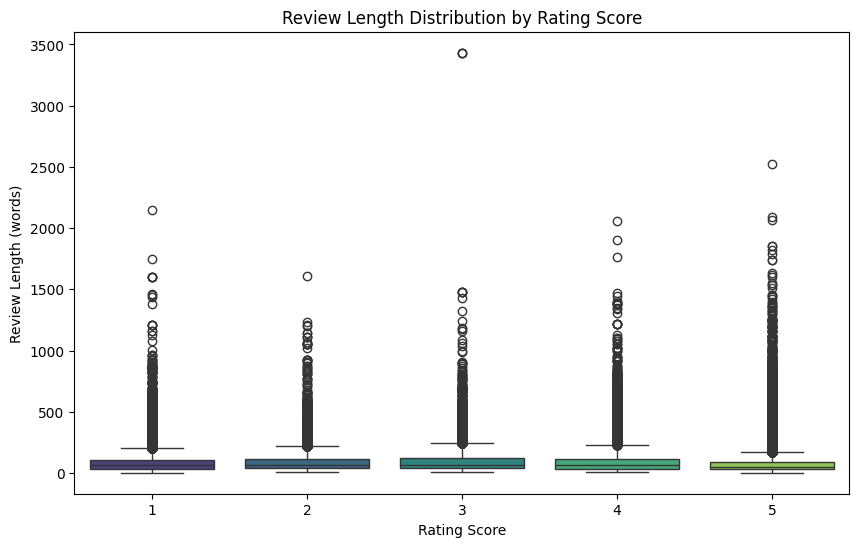

In [ ]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=reviews_df, x='Score', y='ReviewLength', palette='viridis')
plt.title("Review Length Distribution by Rating Score")
plt.xlabel("Rating Score")
plt.ylabel("Review Length (words)")
plt.show()


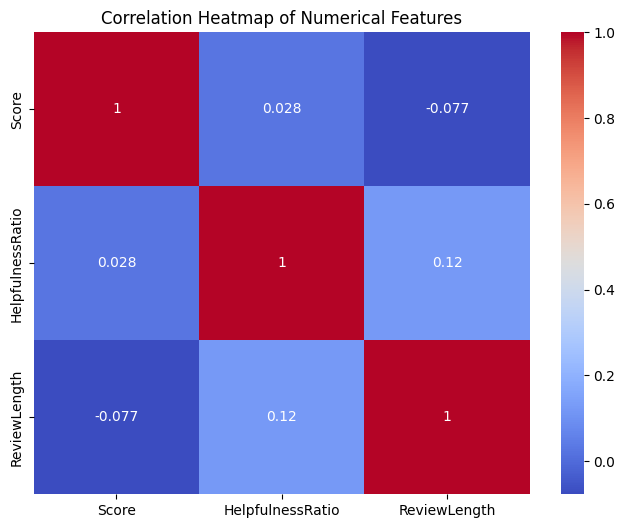

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(reviews_df[['Score', 'HelpfulnessRatio', 'ReviewLength']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


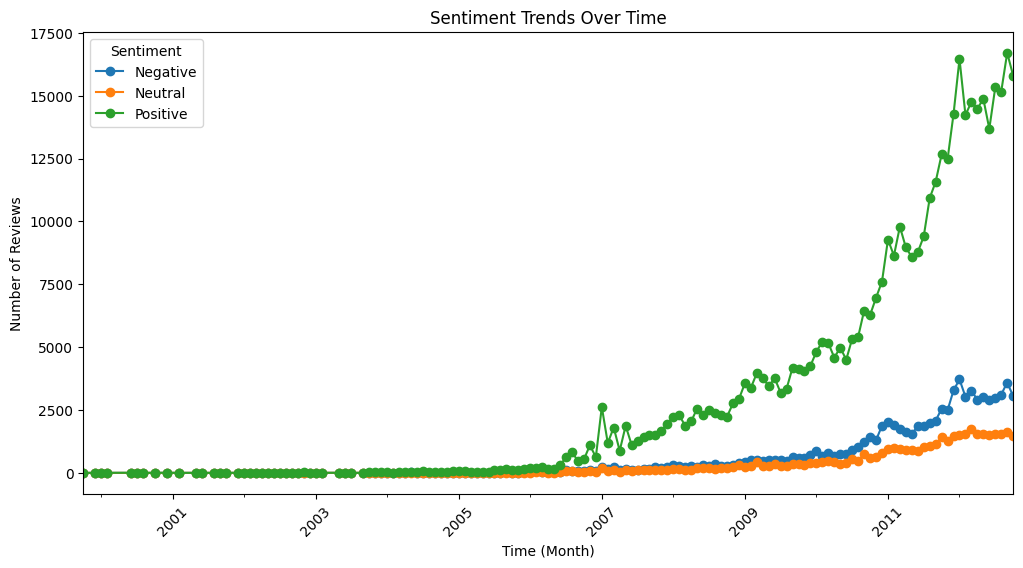

In [ ]:
reviews_df['ReviewTime'] = pd.to_datetime(reviews_df['Time'], unit='s')
reviews_df['ReviewMonth'] = reviews_df['ReviewTime'].dt.to_period('M')

sentiment_trends = reviews_df.groupby(['ReviewMonth', 'Sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sentiment_trends.plot(kind='line', marker='o', ax=plt.gca())
plt.title("Sentiment Trends Over Time")
plt.xlabel("Time (Month)")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()


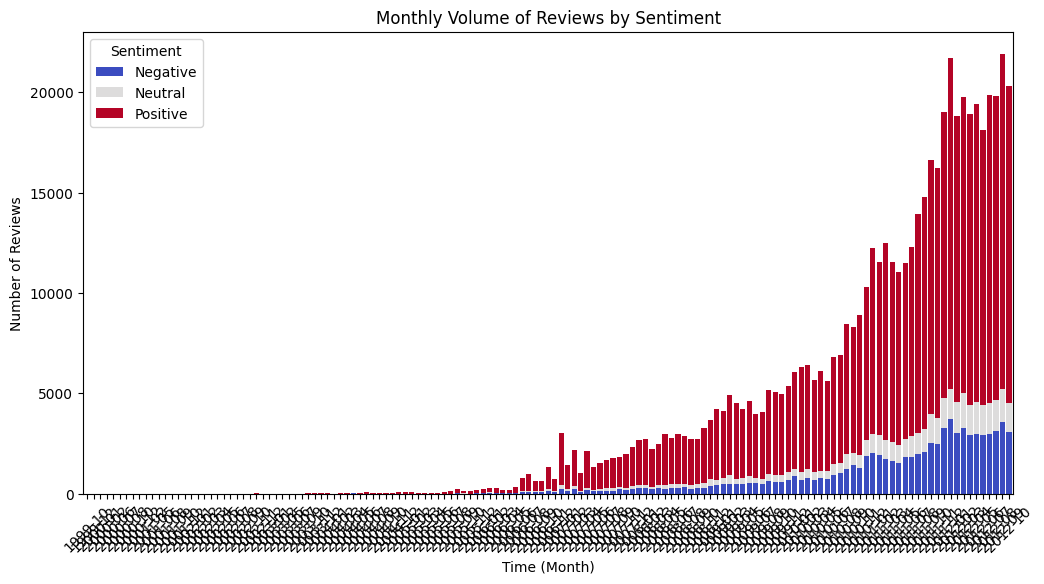

In [ ]:
plt.figure(figsize=(12, 6))
sentiment_trends.plot(kind='bar', stacked=True, width=0.8, colormap='coolwarm', ax=plt.gca())
plt.title("Monthly Volume of Reviews by Sentiment")
plt.xlabel("Time (Month)")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()


<ipython-input-20-d1b08ff16305>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews_df, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


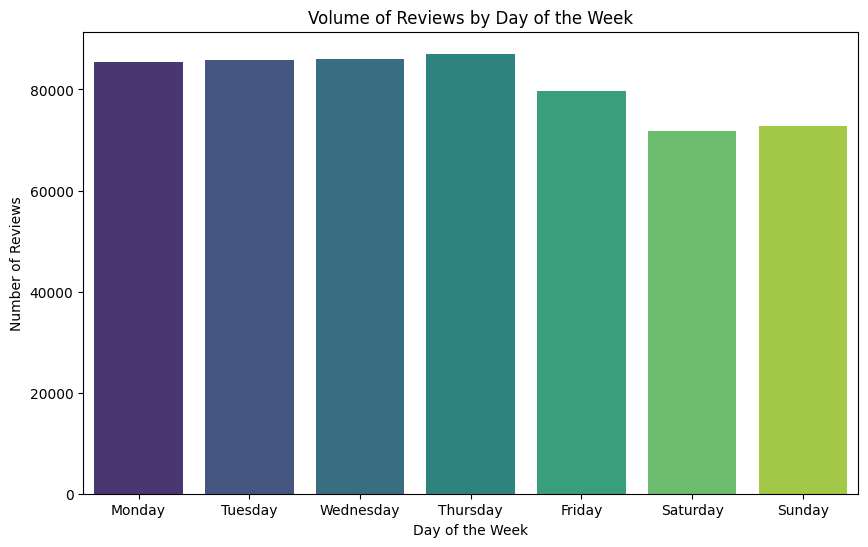

In [ ]:
reviews_df['DayOfWeek'] = reviews_df['ReviewTime'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(data=reviews_df, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title("Volume of Reviews by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Reviews")
plt.show()


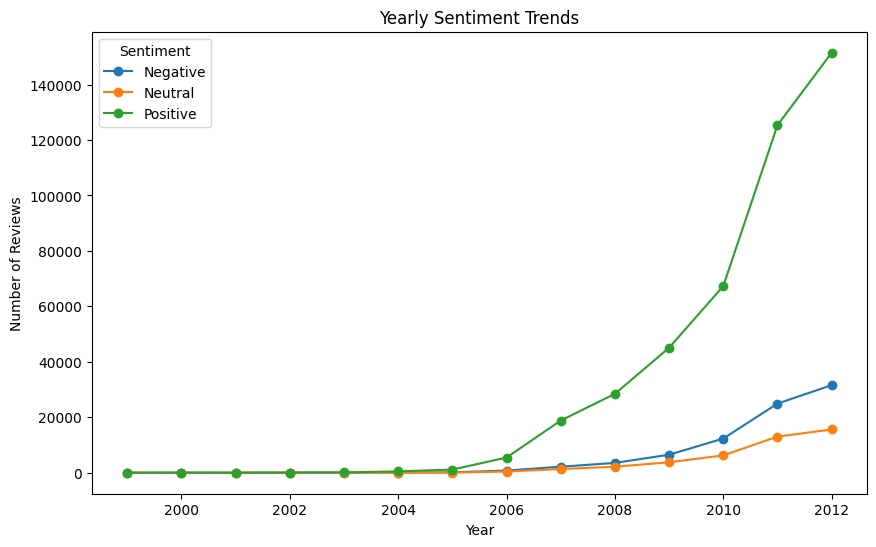

In [ ]:
reviews_df['ReviewYear'] = reviews_df['ReviewTime'].dt.year

yearly_sentiment_trends = reviews_df.groupby(['ReviewYear', 'Sentiment']).size().unstack(fill_value=0)

# Plotting yearly sentiment trends over reviews
plt.figure(figsize=(10, 6))
yearly_sentiment_trends.plot(kind='line', marker='o', ax=plt.gca())
plt.title("Yearly Sentiment Trends")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

if 'Sentiment' in reviews_df.columns:
    # Calculating the accuracy
    accuracy = accuracy_score(reviews_df['Sentiment'][:10], processed_reviews_df['sentiment'])

    # Calculating the precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        reviews_df['Sentiment'][:10], processed_reviews_df['sentiment'] ,average='weighted'
    )

    # Performance Metrics
    print("Sentiment Analysis Performance Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1_score:.2f}")

Sentiment Analysis Performance Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
